# Programming for Data Science Practical Examination
## Introduction 

The challenge of this pratical is to explore the public procurement data available in the portal www.base.gov.pt. <br>
Public Procurements are contracts establish between a public institutions (the issuer of a procurement) and a third-party supplier. <br>
Each contract is classified using the Common Procurement Vocabulary (CPV). The CPV classification aims at establishing a single classification system for public procurement in Europe, helping in comparative statistics and regulation. The CPV is a five level hierarchical classification encoded in a nine digit string. For instance the first two digits identify the division, the first three the groups, and so on. You can find more information about the CPVs at https://simap.ted.europa.eu/cpv


We will use a sample dataset extracted from the portal BASE (www.base.gov.pt) that contains information on public procurements executed between 2012 and 2014. Below you can find a step-by-step instructions of what the tasks you need to perform in order to analyse this dataset. Each step indicates the amount of points you can score. Make sure you comment all your code and provide, when requested, a discussion about what you have done and the results obtained.

This examination does not intend to test your ability to:<br>
. perform complex data analysis;<br>
. develop complex data-driven models; <br>
. write optimal algorithmic solutions to a problem. <br>

**Instead**, it aims to test your ability to implement a pre-planned step by step project in python.

Your submission will be graded according to the following guidelines:
1. Execution (does your program does what is asked from the exercise?)
2. Objectivity (are you using the adequate libraries? are you using a libraries not in the scope of exercise?)
3. Readibility of your code (is your code correctly documented? is variable naming adequate?)

This is an individual activity!

## Submission Details

The deadline for the submission is the 30th of October at 11:59 (am), and submission must be done through the corresponding activity in moodle. Your submission should consist of an archive **(zip file)** containing the following files: <br>
1) A copy of this notebook with your answers; <br>
2) A html version of the notebook with your answers (File -> Download As -> html); <br>
3) An Authorship Statement; <br> 

**Submissions done in .rar archives will not be graded. <br>
Submissions delivered that are not in a jupyter notebook format will not be graded.**

Good Luck, and enjoy!

**PLEASE FILL THE BELOW CELLS WITH THE GROUP MEMBERS INFORMATION:** <br>

In [ ]:
# Student ID: M20211300
# Student Name: Miguel Lince

In [ ]:
# Student ID: M20210664
# Student Name: Tomás Jordão

In [ ]:
# Student ID: R20181082
# Student Name: David Santos

**Important NOTE**

Any reference to the value of procurement, refers to the price or cost of the contract which is in the column "precoContratual"

## Boilerplate

Before you start, let us make sure you have all the necessary packages in your working environment. To that end run the following cells to install and load all the necessary libraries.

**Note** You only need to run this cell once, not everytime you open the notebook.

In [1]:
# Run this cell only if you are missing any of the packages below
import sys
!{sys.executable} -m pip install --upgrade pip --user
!{sys.executable} -m pip install xlrd
!{sys.executable} -m pip install requests
!{sys.executable} -m pip install seaborn

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Then we load the necessary libraries to execute each of the steps below.

In [218]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels as sm
import os
from zipfile import ZipFile

In [219]:
import requests

In [3]:
print('Pandas version ',pd.__version__)
print('Numpy version ',np.__version__)
print('Scipy version ',sp.__version__)
print('Seaborn version ',sns.__version__)
print('StatsModels version ',sm.__version__)

Pandas version  1.3.0
Numpy version  1.20.3
Scipy version  1.6.2
Seaborn version  0.11.1
StatsModels version  0.12.2


In the following steps, please use the alias defined at this step. This will help us to correct your answers and track your steps. Students that fail to use the pre-defined aliases will be penalized. 

Finally, the following cell downloads the dataset for this project. <br>

In [220]:
r = requests.get('https://www.dropbox.com/s/43jqravvvddaljb/PDS2021_Data.zip?dl=1', allow_redirects=True)
open('Data.zip', 'wb').write(r.content);
with ZipFile('Data.zip', 'r') as zipObj:
    zipObj.extractall('DATA')

The above code will store the datafiles in a folder called "DATA" that is in the same filepath as this notebook. <br>
The dataset consists of three xlsx files containing all contracts available in 2018 concerning the contracts issued in 2012, 2013, and 2014 that where available in BASE.

## Exercises (The action starts here)

<b>[Step 1. | 0.5 points ]</b> Load all the procurement datafiles (contratos2012.xlsx, contratos2013.xlsx, and contratos2014.xlsx) into a single dataframe named <i>data</i>.<br>
Notes: This operation might take a while. When reading data from excel it is safer to always specify the Sheet you want to read. You might need to reset the indexes and drop a column of the final dataframe to obtain a more workable dataframe.

In [221]:
path = os.getcwd()
files = os.listdir('DATA')
files_xlsx = ["DATA/" + f for f in files if f[:9] == 'contratos']
files_xlsx

['DATA/contratos2012.xlsx',
 'DATA/contratos2013.xlsx',
 'DATA/contratos2014.xlsx']

In [222]:
data = pd.DataFrame()
for f in files_xlsx:
    df = pd.read_excel(f, sheet_name='Folha1')
    data = df.append(data)

In [7]:
data.head()

,idcontrato,nAnuncio,tipoContrato,tipoprocedimento,objectoContrato,adjudicantes,adjudicatarios,dataPublicacao,dataCelebracaoContrato,precoContratual,cpv,prazoExecucao,localExecucao,fundamentacao
0,1541104,1242/2010,Empreitadas de obras públicas,Concurso limitado por prévia qualificação,"Empreitada de Projecto, Construção e Exploraçã...",506598160 - Águas do Mondego - Sistema Mult. d...,500738793 - JOSÉ MARQUES GRÁCIO SA. | 50115734...,2015-09-04,2014-05-07,1639025.08,45252127-4 - Construção de estação de tratamen...,690,"Portugal, Coimbra, Coimbra | Portugal, Coimbra...","Artigo 31.º, n.º 1 do Código dos Contratos Púb..."
1,1541123,1342/2010,Empreitadas de obras públicas,Concurso limitado por prévia qualificação,"Empreitada de Projecto, Construção e Exploraçã...",506598160 - Águas do Mondego - Sistema Mult. d...,"500023875 - Casais - Engenharia e Construções,...",2015-09-04,2014-05-12,2943077.15,45252127-4 - Construção de estação de tratamen...,690,"Portugal, Coimbra, Arganil","Artigo 31.º, n.º 1 do Código dos Contratos Púb..."
2,1320689,2407/2010,Aquisição de serviços,Concurso público,"Recolha, Transporte e Deposição de resíduos do...",503455539 - Sanest - Saneamento da Costa Estor...,"500512884 - EGEO - TECNOLOGIA E AMBIENTE, SA.",2014-12-09,2014-06-30,525004.90,90512000-9 - Serviços de transporte de resíduos,1095,"Portugal, Lisboa, Cascais | Portugal, Lisboa, ...","Artigo 20.º, n.º 1, alínea b) do Código dos Co..."
3,1157167,3350/2010,Empreitadas de obras públicas,Concurso público,O contrato tem por objecto a construção da Est...,"505176300 - Águas do Algarve, S.A.",500091366 - Eduardo Pinto Contreiras &amp; Fil...,2014-08-22,2014-07-29,1806005.15,45232423-3 - Construção de estações de bombage...,300,"Portugal, Faro, Albufeira","Artigo 19.º, alínea b) do Código dos Contratos..."
4,1229022,3494/2010,Empreitadas de obras públicas,Concurso público,Empreitada para Reabilitação da Célula de Lama...,508608015 - Administração da Região Hidrográfi...,"500285608 - TOMÁS DE OLIVEIRA, EMPREITEIROS, S...",2014-09-15,2014-04-15,3844399.53,45232422-6 - Estação de tratamento de lamas,610,"Portugal, Santarém, Alcanena","Artigo 19.º, alínea b) do Código dos Contratos..."


In [252]:
# fazer uma cópia para nao mexer nos originais
df_copy = data.copy()

In [253]:
df_copy.reset_index(inplace = True)
df_copy.drop(columns = ['index', 'fundamentacao'], inplace = True)
df_copy.head()

,idcontrato,nAnuncio,tipoContrato,tipoprocedimento,objectoContrato,adjudicantes,adjudicatarios,dataPublicacao,dataCelebracaoContrato,precoContratual,cpv,prazoExecucao,localExecucao
0,1541104,1242/2010,Empreitadas de obras públicas,Concurso limitado por prévia qualificação,"Empreitada de Projecto, Construção e Exploraçã...",506598160 - Águas do Mondego - Sistema Mult. d...,500738793 - JOSÉ MARQUES GRÁCIO SA. | 50115734...,2015-09-04,2014-05-07,1639025.08,45252127-4 - Construção de estação de tratamen...,690,"Portugal, Coimbra, Coimbra | Portugal, Coimbra..."
1,1541123,1342/2010,Empreitadas de obras públicas,Concurso limitado por prévia qualificação,"Empreitada de Projecto, Construção e Exploraçã...",506598160 - Águas do Mondego - Sistema Mult. d...,"500023875 - Casais - Engenharia e Construções,...",2015-09-04,2014-05-12,2943077.15,45252127-4 - Construção de estação de tratamen...,690,"Portugal, Coimbra, Arganil"
2,1320689,2407/2010,Aquisição de serviços,Concurso público,"Recolha, Transporte e Deposição de resíduos do...",503455539 - Sanest - Saneamento da Costa Estor...,"500512884 - EGEO - TECNOLOGIA E AMBIENTE, SA.",2014-12-09,2014-06-30,525004.90,90512000-9 - Serviços de transporte de resíduos,1095,"Portugal, Lisboa, Cascais | Portugal, Lisboa, ..."
3,1157167,3350/2010,Empreitadas de obras públicas,Concurso público,O contrato tem por objecto a construção da Est...,"505176300 - Águas do Algarve, S.A.",500091366 - Eduardo Pinto Contreiras &amp; Fil...,2014-08-22,2014-07-29,1806005.15,45232423-3 - Construção de estações de bombage...,300,"Portugal, Faro, Albufeira"
4,1229022,3494/2010,Empreitadas de obras públicas,Concurso público,Empreitada para Reabilitação da Célula de Lama...,508608015 - Administração da Região Hidrográfi...,"500285608 - TOMÁS DE OLIVEIRA, EMPREITEIROS, S...",2014-09-15,2014-04-15,3844399.53,45232422-6 - Estação de tratamento de lamas,610,"Portugal, Santarém, Alcanena"


<b>[Step 2. | 0.5 points ]</b> Perform some quick inspection of the data file in order to answer the following questions:
1. How many records does the dataset include?

In [10]:
df_copy.shape[0]

250092

2. What are the fields names?

In [11]:
df_copy.columns

Index(['idcontrato', 'nAnuncio', 'tipoContrato', 'tipoprocedimento',
       'objectoContrato', 'adjudicantes', 'adjudicatarios', 'dataPublicacao',
       'dataCelebracaoContrato', 'precoContratual', 'cpv', 'prazoExecucao',
       'localExecucao'],
      dtype='object')

3. What are the datatypes of each field?

In [12]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250092 entries, 0 to 250091
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   idcontrato              250092 non-null  int64         
 1   nAnuncio                16740 non-null   object        
 2   tipoContrato            250092 non-null  object        
 3   tipoprocedimento        250092 non-null  object        
 4   objectoContrato         250075 non-null  object        
 5   adjudicantes            250092 non-null  object        
 6   adjudicatarios          250085 non-null  object        
 7   dataPublicacao          250092 non-null  datetime64[ns]
 8   dataCelebracaoContrato  250092 non-null  datetime64[ns]
 9   precoContratual         250092 non-null  float64       
 10  cpv                     250035 non-null  object        
 11  prazoExecucao           250092 non-null  int64         
 12  localExecucao           250092

<b>[Step 3. | 3 points ]</b> As you have probably noticed our raw data is not exactly the cleanest dataset in the block. Indeed, we will need to perform some parsing in order to obtain a good working data. In that sense, write the necessary code to perform the following steps: <br>
1. Break the field <i>cpv</i> into two columns named <i>cpvDOC</i> and <i>CPV</i>.<br>
   The field <i>cpvDOC</i> should retain the CPV id, while the <i>CPV</i> its Description <br>
   For instance, a record with value "72416000-9, Fornecedores de aplicações" should lead to a <i>cpvDOC</i> equal to "72416000-9" and a <i>CPV</i> equal to "Fornecedores de aplicações" <br>
   
   
Use the head command to display the top 10 rows of these new columns (and only these new columns).

In [250]:
# function to split the variables with multiple records
def str_split(x):
    filter_str = []
    for i in x:
        if '|' in str(i):
            filter_str.append(False)
        else:
            filter_str.append(True)
    return filter_str

In [254]:
filter_cpv = str_split(df_copy['cpv'])

In [255]:
filter_cpv.count(False)

3350

In [ ]:
# existem 3350 contratos com mais de um cpv

In [256]:
# vou remover estas linhas
df_copy = df_copy.loc[filter_cpv]

In [257]:
print(f'We dropped {round(100-(len(df_copy)/len(data))*100,2)} % of the procurements in our original data')

We dropped 1.34 % of the procurements in our original data


In [258]:
# compute new columns
df_copy['cpvDOC'] = df_copy['cpv'].map(lambda x: str(x)[0:10])
df_copy['CPV'] = df_copy['cpv'].map(lambda x: str(x)[13:])
df_copy.drop('cpv', axis=1, inplace=True)

In [259]:
# display top ten rows and the new calculated columns
df_copy.head(10).loc[:,['cpvDOC','CPV']]

,cpvDOC,CPV
0,45252127-4,Construção de estação de tratamento de águas r...
1,45252127-4,Construção de estação de tratamento de águas r...
2,90512000-9,Serviços de transporte de resíduos
3,45232423-3,Construção de estações de bombagem de águas re...
4,45232422-6,Estação de tratamento de lamas
5,50411000-9,Serviços de reparação e manutenção de aparelho...
6,45232460-4,Obras de saneamento
7,45200000-9,Obras de construção total ou parcial e de enge...
8,50000000-5,Serviços de reparação e manutenção
9,71314100-3,Serviços de electricidade


2. Convert any fields with dates to datetime objects. Show the datatypes of all fields after your conversion.<br>
**Tip:** You might want to check the link https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html for some tips regarding datetime conversion 



In [261]:
# read excel already read the datetime variables correctly so this step is redundant
df_copy['dataPublicacao'] = pd.to_datetime(df_copy['dataPublicacao'], format='%Y%m%d')
df_copy['dataCelebracaoContrato'] = pd.to_datetime(df_copy['dataCelebracaoContrato'], format='%Y%m%d')

3. In the fields <i>adjudicantes</i> (issuers) and <i>adjudicatários</i> (suppliers) you should have noticed that it includes both the name and the fiscal numbers (NIF) of the participating institutions.<br>
   For each of those two fields, split each record into two new fields. <br>
   <i>Entidade adjudicante - Nome, NIF</i> split into <i>issuerNIF</i> and <i>issuerName</i>.<br>
   <i>Entidade adjudicatária - Nome, NIF</i> split into <i>supplierNIF</i> and <i>supplierName</i>.<br>
   
   
   You will find that in some cases there are multiple entities in those fields, which are separated by "|". Explain: how have you worked around such cases? 
   
   If you are not able to perform this, feel free to ignore/drop the records that have multiple entities in each of those fields, but report what is the percentage of procurements that you would be dropping.

In [270]:
#fiz uma cópia só para não ter de estar sempre a ir buscar o data
data_play = df_copy.copy()

In [263]:
filter_adj = str_split(data_play['adjudicantes'])

In [271]:
data_play = data_play.loc[filter_adj]

In [272]:
filter_sup = str_split(data_play['adjudicatarios'])

In [273]:
data_play = data_play.iloc[filter_sup]

In [274]:
print(f'We dropped {round(100-(len(data_play)/len(data))*100,2)} % of the procurements in our original data')

We dropped 2.89 % of the procurements in our original data


In [275]:
# split the columns in two 3 new columns
data_play['issuerNIF'] = data_play['adjudicantes'].apply(lambda x: str(x)[:9])
data_play['issuerName'] = data_play['adjudicantes'].apply(lambda x: str(x)[12:])
data_play['supplierNIF'] = data_play['adjudicatarios'].apply(lambda x: str(x)[:9])
data_play['supplierName'] = data_play['adjudicatarios'].apply(lambda x: str(x)[12:])

# droping the initial ones
data_play.drop(columns=['adjudicantes','adjudicatarios'], inplace=True)


In [276]:
data_play.head()

,idcontrato,nAnuncio,tipoContrato,tipoprocedimento,objectoContrato,dataPublicacao,dataCelebracaoContrato,precoContratual,prazoExecucao,localExecucao,cpvDOC,CPV,issuerNIF,issuerName,supplierNIF,supplierName
1,1541123,1342/2010,Empreitadas de obras públicas,Concurso limitado por prévia qualificação,"Empreitada de Projecto, Construção e Exploraçã...",2015-09-04,2014-05-12,2943077.15,690,"Portugal, Coimbra, Arganil",45252127-4,Construção de estação de tratamento de águas r...,506598160,Águas do Mondego - Sistema Mult. de Abast. Águ...,500023875,"Casais - Engenharia e Construções, S.A."
2,1320689,2407/2010,Aquisição de serviços,Concurso público,"Recolha, Transporte e Deposição de resíduos do...",2014-12-09,2014-06-30,525004.90,1095,"Portugal, Lisboa, Cascais | Portugal, Lisboa, ...",90512000-9,Serviços de transporte de resíduos,503455539,"Sanest - Saneamento da Costa Estoril, SA",500512884,"EGEO - TECNOLOGIA E AMBIENTE, SA."
5,1293929,350/2010,Aquisição de serviços,Concurso público,Aquisição de serviços de Reabilitação e operac...,2014-11-07,2014-07-18,3294000.00,732,"Portugal, Portugal Continental",50411000-9,Serviços de reparação e manutenção de aparelho...,503237965,"Instituto da Água, I. P.",503636452,Bruno &amp; Lopes - Engenheiros Civis Associad...
6,1260153,413/2010,Empreitadas de obras públicas,Concurso público,Rede de Drenagem de Águas Residuais Domésticas...,2014-10-02,2014-01-16,856471.75,365,"Portugal, Castelo Branco, Sertã",45232460-4,Obras de saneamento,506963837,Município da Sertã,504870475,"Lusosicó- Construções, S.A"
7,1083754,4890/2010,Empreitadas de obras públicas,Concurso público,P127/2010/CPA - Remodelação do Antigo Edifício...,2014-05-30,2014-05-29,768537.31,365,"Portugal, Santarém, Ourém",45200000-9,Obras de construção total ou parcial e de enge...,501280740,Município de Ourém,506378527,"NORTEJUVIL, SOCIEDADE DE CONSTRUÇÕES LDA."


4. Verify that the parsing was successful 

<b>[Step 4. | 5 points ]</b> Let us do some exploratory analysis of the data. The goal is to develop some familarity with the data, which we will do by answering some simple questions. Knowing which questions to ask is an important step for any successful data science project. In that sense, write down the necessary code to answer the following questions:

You can report the results using a meaningful visualization (check out https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html or the seaborn module)

1. What is the total value (precoContratual) of procurements per month?

In [277]:
data_play['month'] = data_play['dataCelebracaoContrato'].apply(lambda x: x.month)
data_play['monthyear'] = data_play['dataCelebracaoContrato'].apply(lambda x: x.year*100+x.month)
data_play['precoContratual_M'] = data_play['precoContratual']/1000000

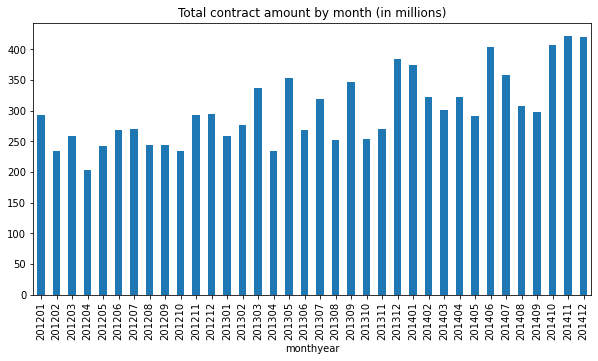

In [278]:
plt.figure(figsize=(10,5))
data_play.groupby('monthyear').precoContratual_M.agg('sum').plot(kind='bar')
plt.title('Total contract amount by month (in millions)')
plt.show()

2. How many procurements have been issued per **month of year**?

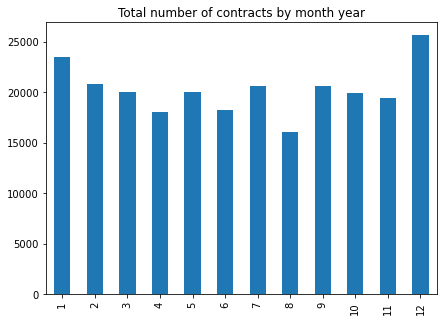

In [289]:
plt.figure(figsize=(7,5))
data_play['month'].value_counts().sort_index().plot(kind='bar')
plt.title('Total number of contracts by month year')
plt.show()

3. What is the distribution of values? In other words, what is the proportion of procurements that have value X?  
Can you build a visualization and highlight what you found more interesting and discuss it? 

**Note:** Consider working with the Logarithm base 10 of values; Consider use predefined bin in the X values.

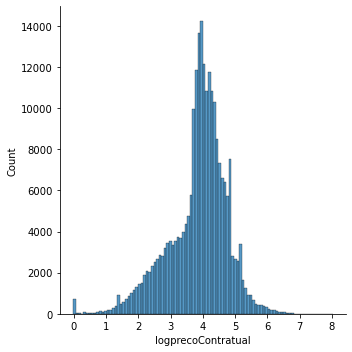

In [281]:
#because we have contract with value 0 and log of 0 is indetermined I will add 1 euro to each contract
data_play['logprecoContratual'] = data_play['precoContratual'].apply(lambda x: np.log10(x+1))
sns.displot(data=data_play, x='logprecoContratual', bins = 100)
plt.show()

4. In the dataset, how many issuing Institutions are there? And how many suppliers?

In [282]:
print(f'There are {len(data_play.issuerNIF.unique())} issuing Institutions in the dataset')
print(f'There are {len(data_play.supplierNIF.unique())} suppleirs in the dataset')

There are 5703 issuing Institutions in the dataset
There are 42662 suppleirs in the dataset


5. What services has ISEGI-Inst Superior de Estatistica e Gestão de Informação da UNL (NIF: 502322152) supplied? And who are the top three issuers/beneficiaries of such services?

In [290]:
# services of ISEGI
isegi_serv = data_play.loc[data_play['supplierNIF']=='502322152', 'CPV'].unique()
print(isegi_serv)

['Serviços de TI: consultoria, desenvolvimento de software, Internet e apoio'
 'Serviços de ensino e formação' 'Serviços de avaliação dos resultados'
 'Serviços de sondagens de opinião' 'Serviços de estudos de mercado'
 'Serviços de desenvolvimento de software para sectores específicos']


In [292]:
# NIF of top three issuers of these services
data_play.loc[data_play['CPV'].isin(isegi_serv)].groupby('issuerNIF').CPV.agg('count').sort_values(ascending=False)[:3]

issuerNIF
509906478    607
501886354    563
502017368    141
Name: CPV, dtype: int64

In [36]:
# NIF of top three beneficiaries of these services
data_play.loc[data_play['CPV'].isin(isegi_serv)].groupby('supplierNIF').CPV.agg('count').sort_values(ascending=False)[:3]

supplierNIF
506176142    85
504857312    56
505141019    46
Name: CPV, dtype: int64

In [37]:
filt_top_iss = list(data_play.loc[data_play['CPV'].isin(isegi_serv)].groupby('issuerNIF').CPV.agg('count').sort_values(ascending=False)[:3].index)
filt_top_sup = list(data_play.loc[data_play['CPV'].isin(isegi_serv)].groupby('supplierNIF').CPV.agg('count').sort_values(ascending=False)[:3].index)

In [301]:
#top three issuers
filt_top_iss

['509906478', '501886354', '502017368']

In [319]:
#top three suppliers
filt_top_sup

['506176142', '504857312', '505141019']

6. What are the top five services (CPV) contracted by Hospital de Santa Maria Maior (NIF: 506361381)?

In [320]:
data_play.loc[data_play['issuerNIF'].eq('506361381')].groupby('CPV').CPV.agg('count').sort_values(ascending=False)[:5]

CPV
Medicamentos usados na terapêutica endócrina                   21
Medicamentos vários                                            21
Vestuário profissional                                         12
Medicamentos para o sangue e para os órgãos hematopoiéticos    10
Reagentes de laboratório                                        8
Name: CPV, dtype: int64

7. What services (CPV) has Novo Banco, S.A. (NIF: 513204016) supplied? Aggregate the output by CPV and sort by descending order of total value.

In [321]:
data_play.loc[data_play['supplierNIF'].eq('513204016')].groupby('CPV').precoContratual.agg('sum').sort_values(ascending=False)

CPV
Automóveis de passageiros            19918.7
Serviços das agências de cobrança    16372.8
Name: precoContratual, dtype: float64

8. Can you measure the correlation between the length/duration of contract ("prazoExecucao") and the final value ("precoContratual")? Are longer contracts more costly?<br>
(Remember there might already exist a method to help you out)
    
    8.1 What if you plot the average price per day as a function of the duration of the contract? What relationship to you obtain?
    
Note: The objective is to aggregate all contracts with a duration X, and then compute the average cost/value per day of such contracts. What relationship do you observe? Are longer contracts cheaper in a daily cost? Or more expensive?

In [322]:
#8. Pearson
data_play[['prazoExecucao','precoContratual']].corr(method='pearson')

,prazoExecucao,precoContratual
prazoExecucao,1.000000,-0.000022
precoContratual,-0.000022,1.000000


<b> R: </b> Even though that the the pearson coefficient is very small giving us the ideia that there is no significant linear correlation between both variables we have a negative direction which implies that longer contracts appear to less costly

In [323]:
#8.1
#aggregating each value of prazoExecucao and summing precoContratual. as_index = False so I can compute average daily cost
new_df = data_play.groupby('prazoExecucao',as_index=False).precoContratual.agg('sum')

In [324]:
new_df.head()

,prazoExecucao,precoContratual
0,0,6.040309e+06
1,1,1.158631e+08
2,2,6.161627e+07
3,3,2.809131e+07
4,4,1.557353e+07


In [325]:
# creating a new variables as the average price per day of contracts 
new_df['precoDiario'] = new_df['precoContratual']/new_df['prazoExecucao']

<AxesSubplot:xlabel='precoDiario', ylabel='prazoExecucao'>

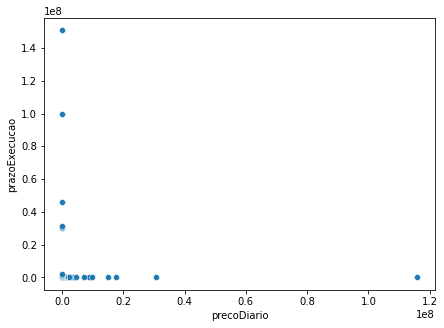

In [326]:
# plot the average daily price as a function of prazoExecucao
plt.figure(figsize=(7,5))
sns.scatterplot(data=new_df, x='precoDiario', y='prazoExecucao')

<b> R: </b> The data presents strong outliers and this may be hidden the relationship of the 2 variables lets look closer

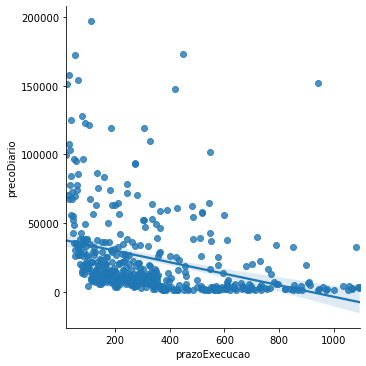

In [327]:
sns.lmplot(data=new_df.loc[(new_df['precoDiario']>1000)&(new_df['precoDiario']<200000)&(new_df['prazoExecucao']<1095)], x='prazoExecucao',y='precoDiario')

<b> R: </b> It looks like as pearson coefficient was says theres a slight negative correlation between duration and cost. lets try to investigate further

In [328]:
# compute the percentiles of contract durantion
new_df['Q_prazoExec'] = pd.qcut(new_df['prazoExecucao'], 10)

In [329]:
# calculating the average cost per day for each percentile
new_df.groupby(['Q_prazoExec']).precoDiario.agg('mean')

Q_prazoExec
(-0.001, 116.8]                   NaN
(116.8, 233.6]           87819.186739
(233.6, 350.4]           36146.373992
(350.4, 468.2]           51079.744960
(468.2, 594.0]            9226.094158
(594.0, 736.8]            7107.004949
(736.8, 909.6]            1553.598061
(909.6, 1080.4]           2032.286927
(1080.4, 1640.6]          7890.786056
(1640.6, 150719240.0]      802.410632
Name: precoDiario, dtype: float64

<b>R: </b> Indeed as we saw before longer contracts present a smaller cost per day on average

<b>[Step 5. | 5 points ]</b> You probably have noticed that our dataset includes procurements issued by municipalities (Câmara Municipal or Município). Interesting huh?

Next, we will explore municipality procurement data a bit more in detail. To that end, we will need to process our procurement dataset, in order to obtain the procurements of each municipality, aggregate the data and obtain the relevant metrics.

However, the data is not uniform as some typos lead to the same municipality having different names. Moreover, there are municipal companies that have a different fiscal code than the municipalities. To make it simple, let us ignore municipal companies. Moreover, we have prepared beforehand a .csv file that lists all the NIF ids associated wit each municipality.

**NOTE. The file MunicipiosNIF.xlsx is available to download from Moodle.**

1. Download the file MunicipiosNIF.xlsx from Moodle and load it into a dataframe;

In [330]:
df_municip = pd.read_excel('MunicipiosNIF.xlsx')

In [331]:
df_municip.head()

,NIF,Municipality
0,500051054,Município de Almada
1,500051062,Município de Sintra
2,500051070,Município de Lisboa
3,500745773,Município de Alcanena
4,500745943,Município de Oeiras


2. Create a new dataframe that contains only the procurements issued by municipalities. Use the dataframe created above to aid your filtering.

**Note:** you will end up with situations where the same municipality will have different names, although it has the same NIF. Consider using only the NIF as the unique identifier of a municipality, and if there are multiple names associated to it, to choose one. Explain how did you proceed.

In [332]:
#changing the NIF to object
df_municip.NIF = df_municip.NIF.astype('str')

# merging the dataframes by NIF: keep only contracts issued by municipalities
df_mproc = pd.merge(left=df_municip, right=data_play, how='inner', left_on='NIF', right_on='issuerNIF')

In [333]:
df_mproc.head()

,NIF,Municipality,idcontrato,nAnuncio,tipoContrato,tipoprocedimento,objectoContrato,dataPublicacao,dataCelebracaoContrato,precoContratual,...,cpvDOC,CPV,issuerNIF,issuerName,supplierNIF,supplierName,month,monthyear,precoContratual_M,logprecoContratual
0,500051054,Município de Almada,1048427,5137/2012,Empreitadas de obras públicas,Concurso público,CONSTRUÇÃO DE UM JARDIM URBANO COM ACESSOS E C...,2014-04-29,2014-04-22,295000.00,...,45112700-2,Trabalhos de paisagismo,500051054,Câmara Municipal de Almada,504338854,"Perene, S.A.",4,201404,0.295000,5.469823
1,500051054,Município de Almada,974822,3856/2013,Aquisição de serviços,Concurso público,Aquisição de Serviços de Fornecimento de Energ...,2014-02-07,2014-01-24,279706.00,...,65300000-6,Serviços de distribuição de electricidade e se...,500051054,Câmara Municipal de Almada,503504564,"EDP Comercial, SA",1,201401,0.279706,5.446703
2,500051054,Município de Almada,943569,3907/2013,Empreitadas de obras públicas,Concurso público,CPN01232E - Empreitada de obras de adaptação d...,2014-01-09,2014-01-06,115953.51,...,45453100-8,Obras de recuperação,500051054,Câmara Municipal de Almada,507909070,"TEMPO ANALÓGICO, LDA.",1,201401,0.115954,5.064288
3,500051054,Município de Almada,966965,4580/2013,Aquisição de serviços,Concurso público,Prestação de serviços de reparação de viaturas...,2014-01-31,2014-01-27,252000.00,...,50110000-9,Serviços de reparação e manutenção de veículos...,500051054,Câmara Municipal de Almada,500595909,Coopban Cooperativa de Produção Operária Metal...,1,201401,0.252000,5.401402
4,500051054,Município de Almada,1005419,4745/2013,Empreitadas de obras públicas,Concurso público,Concurso Público nº CPN01821E- Empreitada de o...,2014-03-13,2014-03-11,35486.19,...,45453100-8,Obras de recuperação,500051054,Câmara Municipal de Almada,B70278528,"Casdiboca, S.L.",3,201403,0.035486,4.550072


3. What are the top ten suppliers in terms of value (total cost in euros) spent by the municipality of Lisbon?

In [334]:
df_municip[df_municip['Municipality'].str.contains('Lisboa')]

,NIF,Municipality
2,500051070,Município de Lisboa


In [335]:
df_mproc.loc[df_mproc['issuerNIF']=='500051070', ['precoContratual_M', 'supplierName']]\
                                .sort_values(by = 'precoContratual_M', ascending = False)[:10]

,precoContratual_M,supplierName
3341,5.530271,"Habitamega Construções, S.A."
3996,4.417319,"CONSTRUTORA UDRA, LDA."
2391,3.494400,"Teixera, Pinto &amp; Soares, S.A."
1441,2.913644,"EDP Comercial, SA"
3946,2.860192,"- IBERDROLA GENERACION, S.A.U."
1451,2.651348,Securitas - Serviços e Tecnologia de Segurança...
1449,2.198485,"Ferreira - Construção, S.A."
2254,2.092509,"Controp-Congevia,SA"
1469,2.083773,"Alexandre Barbosa Borges, S. A."
2264,1.945001,"VODAFONE PORTUGAL - Comunicações Pessoais, S.A."


4. What are the top ten services in terms of value (total cost in euros) supplied to the Municipality of Lisbon?

In [336]:
df_mproc.loc[df_mproc['issuerNIF']=='500051070', ['precoContratual_M','CPV']]\
                                .groupby('CPV').agg('sum')\
                                .sort_values(by = 'precoContratual_M', ascending = False)[:10]

,precoContratual_M
CPV,
Construção de edifícios destinados à educação ou à investigação,14.856385
Outros serviços,13.960549
Construção,10.531445
Serviços de limpeza,10.471798
Serviços de vigilância,8.109279
Trabalhos de paisagismo,7.034760
Construção de edifícios multifuncionais,6.578227
Construção de instalações para ocupação de tempos livres,5.530271
Obras de recuperação,5.459605


5. Compute the average value of the procurements (only those contracted by municipalities) per supplier. <br>
    5.1 Show as an histogram the number of companies that received a total amount X from municipalities. <br>
    5.2 Identify the top 10 companies that received more money from municipalities.

In [337]:
#5
avg_contract_value = df_mproc.groupby(by = 'supplierNIF')['precoContratual'].mean()
avg_contract_value

supplierNIF
003596308    15375.00
025474203    27000.00
043253616     7626.40
063717106     7424.15
06966442H    14750.00
               ...   
G47478920    10000.00
G91665232     8700.00
GB3279311     8500.00
NL8211743    49000.00
NL8218119     4140.00
Name: precoContratual, Length: 17088, dtype: float64

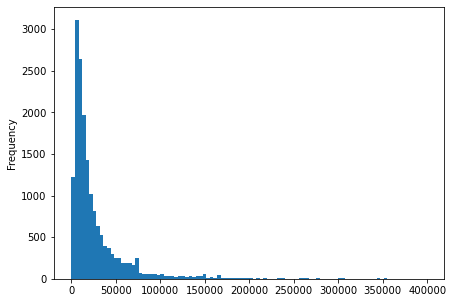

In [338]:
#5.1
#histograma
plt.figure(figsize=(7,5))
avg_contract_value[(avg_contract_value>0)&(avg_contract_value<0.4*10**6)].plot(kind='hist', bins=100)
plt.show()

In [339]:
#5.2
df_mproc.groupby(by = 'supplierName')['precoContratual_M'].sum().sort_values(ascending = False)[:10]

supplierName
EDP Comercial, SA                                                              138.003430
Galp Energia, SA.                                                               62.174568
Uniself Sociedade de Restaurantes Públicos e Privados SA                        44.827723
GERTAL - Companhia Geral de Restaurantes e Alimentação, S.A.                    40.688761
ECOAMBIENTE, Consultores de Engenharia, Gestão e Prestação de Serviços, Lda     28.781585
CIP Construção, S.A.                                                            25.540260
EUREST (PORTUGAL) - Sociedade Europeia de Restaurantes,lda.                     25.057899
Domingos da Silva Teixeira, S.A.                                                24.069874
Repsol Portuguesa, S.A:                                                         23.491197
Alexandre Barbosa Borges, S. A.                                                 20.321560
Name: precoContratual_M, dtype: float64

6. What is the most common "tipoprocedimento" of procurements issued by municipalities? <br>
    6.1 What if you consider only procurements with a value above 50 000 euros? <br>
    6.2 How do you relate/compare these results with those obtained in Question 3 of Step 4?

In [340]:
#6
print(df_mproc['tipoprocedimento'].mode()[0])

Ajuste Direto Regime Geral


In [341]:
#6.1
print(df_mproc.loc[df_mproc['precoContratual']> 50*10**3,'tipoprocedimento'].mode()[0])

Ajuste Direto Regime Geral


In [342]:
#6.2
print(df_mproc.groupby(by = 'tipoprocedimento').issuerName.count().sort_values(ascending = False))
print(df_mproc[df_mproc.precoContratual > 50*10**3].groupby(by = 'tipoprocedimento').issuerName.count().sort_values(ascending = False))

tipoprocedimento
Ajuste Direto Regime Geral                   54918
Concurso público                              5384
Ao abrigo de acordo-quadro (art.º 258.º)       371
Ao abrigo de acordo-quadro (art.º 259.º)       311
Concurso limitado por prévia qualificação       40
Name: issuerName, dtype: int64
tipoprocedimento
Ajuste Direto Regime Geral                   7838
Concurso público                             3766
Ao abrigo de acordo-quadro (art.º 258.º)      139
Ao abrigo de acordo-quadro (art.º 259.º)      107
Concurso limitado por prévia qualificação      31
Name: issuerName, dtype: int64


<b> R: </b> The proportion of tipoprocedimento in the sample is 90% and compared with the sub-sample of contracts with value greater than 50k this proportion is reduced to 66%. <br>
Based on 'decreto-lei n.º 18/2008, de 29 de janeiro' 'Ajuste Direto' can be adjudicated directly to aquisition of goods and services with a value under 75k without opening a public tender. So to conclude, makes sense that 'Ajuste Direto' to be the most common procedure for the all sample and to decrease the importance when you only look for contracts with a value higher than 50k

<b>[Step 6. | 4 points ]</b> Next, and in the spirit of a vast scientific literature on Urban Scaling Laws (https://tinyurl.com/y8ohmzx7), let us investigate the relationship between the number and value of procurements issued by municipalities and their population size.

To that end we will need to download and load an additional dataset that includes the population size of each municipality.<br> 
This dataset was obtained from the portal pordata. As is the case in many data science projects we don't have a perfect matching key between the population data and the procurement data we have been working so far. 

**NOTE. The file popsize.csv is available for download from Moodle.**

1. Download the file popsize.csv from Moodle and load it to a dataframe. <br>
    1.1 Explore the dataframe and explain how can you link this data to the procurement data.

In [343]:
df_pop = pd.read_csv('popsize.csv', delimiter = ";")

In [344]:
df_pop.sort_values('Location')

,Location,Population
158,Abrantes,37 895
138,Aguiar da Beira,5 266
248,Alandroal,5 634
99,Albergaria-a-Velha,24 816
262,Albufeira,40 119
...,...,...
151,Vouzela,10 282
98,Águeda,47 249
252,Évora,55 339
103,Ílhavo,38 456


In [346]:
# replace the Location to match Municipality
df_pop['Location'].replace('Calheta [R.A.A.]','Calheta São Jorge', inplace=True)
df_pop['Location'].replace('Calheta [R.A.M.]','Calheta', inplace=True)
df_pop['Location'].replace('Lagoa [R.A.A.]','Lagoa - Açores', inplace=True)
df_pop['Location'].replace('Castanheira de Pêra','Castanheira de Pera', inplace=True)
df_pop['Location'].replace('Vila da Praia da Vitória','Praia da Vitória', inplace=True)

Explanation: In the procument data (df_mproc) I have a column named Municipality and I will create a new variable that will be key for the procument data and population datasets where we only leave the municipality name and we will merge the 2 datasets

2. Create a new dataframe in which contracts are aggregated by municipality. You should have a dataframe in which the columns correspond to: NIF; Municipality Name; Population Size; Number of Issued Procurements; Total Value of Issued Procurements. 

**Note:** You will have to merge at least two dataframes, and apply several aggregations.

In [347]:
# copying the municipality data and contracts
df_mproc_copy = df_mproc.copy()

In [348]:
# function to remove the start of the string and leave only the names
def municip_filter(x):
    removal_list = ["Município de ","Município da ","Município do ","Município das ", "Município dos ", " – Câmara Municipal"]
    for words in removal_list:
        x = x.replace(words, "")
    return x 

In [349]:
df_mproc_copy['Municip_Key'] = df_mproc_copy['Municipality'].map(municip_filter)

In [350]:
df_mproc_copy['Municip_Key'].replace('Vila Velha de Rádío','Vila Velha de Ródão', inplace=True)

In [351]:
number_procs = df_mproc_copy.groupby(['issuerNIF','Municipality','Municip_Key'], as_index=False).precoContratual_M.agg(['count', 'sum']).reset_index()
number_procs.sort_values(by='Municipality').head()

,issuerNIF,Municipality,Municip_Key,count,sum
107,505456010,Município da Amadora,Amadora,582,45.887736
55,501290206,Município da Batalha,Batalha,107,5.689477
59,501305564,Município da Chamusca,Chamusca,44,3.261138
101,505330768,Município da Covilhã,Covilhã,211,10.963042
279,511233620,Município da Câmara de Lobos,Câmara de Lobos,93,11.670486


In [352]:
df_mproc_pop = pd.merge(left=df_mproc_copy, right=df_pop, how='left', left_on='Municip_Key', right_on='Location')

In [353]:
df_mproc_pop.head()

,NIF,Municipality,idcontrato,nAnuncio,tipoContrato,tipoprocedimento,objectoContrato,dataPublicacao,dataCelebracaoContrato,precoContratual,...,issuerName,supplierNIF,supplierName,month,monthyear,precoContratual_M,logprecoContratual,Municip_Key,Location,Population
0,500051054,Município de Almada,1048427,5137/2012,Empreitadas de obras públicas,Concurso público,CONSTRUÇÃO DE UM JARDIM URBANO COM ACESSOS E C...,2014-04-29,2014-04-22,295000.00,...,Câmara Municipal de Almada,504338854,"Perene, S.A.",4,201404,0.295000,5.469823,Almada,Almada,171 481
1,500051054,Município de Almada,974822,3856/2013,Aquisição de serviços,Concurso público,Aquisição de Serviços de Fornecimento de Energ...,2014-02-07,2014-01-24,279706.00,...,Câmara Municipal de Almada,503504564,"EDP Comercial, SA",1,201401,0.279706,5.446703,Almada,Almada,171 481
2,500051054,Município de Almada,943569,3907/2013,Empreitadas de obras públicas,Concurso público,CPN01232E - Empreitada de obras de adaptação d...,2014-01-09,2014-01-06,115953.51,...,Câmara Municipal de Almada,507909070,"TEMPO ANALÓGICO, LDA.",1,201401,0.115954,5.064288,Almada,Almada,171 481
3,500051054,Município de Almada,966965,4580/2013,Aquisição de serviços,Concurso público,Prestação de serviços de reparação de viaturas...,2014-01-31,2014-01-27,252000.00,...,Câmara Municipal de Almada,500595909,Coopban Cooperativa de Produção Operária Metal...,1,201401,0.252000,5.401402,Almada,Almada,171 481
4,500051054,Município de Almada,1005419,4745/2013,Empreitadas de obras públicas,Concurso público,Concurso Público nº CPN01821E- Empreitada de o...,2014-03-13,2014-03-11,35486.19,...,Câmara Municipal de Almada,B70278528,"Casdiboca, S.L.",3,201403,0.035486,4.550072,Almada,Almada,171 481


In [354]:
## 0 nans: the merge was successfull
df_mproc_pop['Population'].isna().sum()

0

In [355]:
#NIF; Municipality Name; Population Size; Number of Issued Procurements; Total Value of Issued Procurements.
data_pop = df_mproc_pop.groupby(['NIF','Municipality','Population'], as_index=False).precoContratual.agg(['count', 'sum']).reset_index()

In [356]:
data_pop = data_pop.rename(columns ={'count':'Number_Procurements_Issued', 'sum':'Total_Value_Issued'})
data_pop

,NIF,Municipality,Population,Number_Procurements_Issued,Total_Value_Issued
0,500051054,Município de Almada,171 481,725,2.793470e+07
1,500051062,Município de Sintra,379 860,710,5.900182e+07
2,500051070,Município de Lisboa,520 549,2861,2.001943e+08
3,500745773,Município de Alcanena,13 490,66,2.706821e+06
4,500745943,Município de Oeiras,172 689,1062,6.120665e+07
...,...,...,...,...,...
303,512074410,Município de Lagoa - Açores,14 636,116,2.233646e+06
304,512074771,Município de São Roque do Pico,3 371,36,1.605109e+06
305,512074836,Município de Lajes das Flores,1 527,20,4.843389e+06
306,512075506,Município das Velas,5 347,29,2.369482e+06


3. It is common procedure to compare not the absolute values of the different dimensions but their Logarithm. In that sense, create three new columns in your dataframe that correspond to: <br>
    i) The Logarithm of base 10 of the Total Value of Issue Procurements; <br>
    ii) Number of Issued Procurements; <br>
    iii) Population Size.

In [357]:
# removing whitespaces in Population
data_pop['Population'] = data_pop['Population'].apply(lambda x: str(x).replace(' ', '')).astype(int)

In [358]:
data_pop['logTotal_Value'] = data_pop['Total_Value_Issued'].map(lambda x: np.log10(x+1))
data_pop['logNumber_Procurements'] = data_pop['Number_Procurements_Issued'].map(lambda x: np.log10(x+1))
data_pop['logPopulation'] = data_pop['Population'].astype(float).map(lambda x: np.log10(x+1))

In [359]:
data_pop.head()

,NIF,Municipality,Population,Number_Procurements_Issued,Total_Value_Issued,logTotal_Value,logNumber_Procurements,logPopulation
0,500051054,Município de Almada,171481,725,2.793470e+07,7.446144,2.860937,5.234219
1,500051062,Município de Sintra,379860,710,5.900182e+07,7.770865,2.851870,5.579625
2,500051070,Município de Lisboa,520549,2861,2.001943e+08,8.301452,3.456670,5.716462
3,500745773,Município de Alcanena,13490,66,2.706821e+06,6.432460,1.826075,4.130044
4,500745943,Município de Oeiras,172689,1062,6.120665e+07,7.786799,3.026533,5.237267


4. Compute the pearson correlation between the municipalities Log of the Population Size with: <br>
    i) the Log of Total Number of Issued Procurements; <br>
    ii) the Log of the Total Value of Issued Procurements. 
    
    Use the columns you pre computed in the previous question.
    
    4.1 **Make a scatter plot** for each pair of variables to assess the identified relationship.

In [360]:
#i
data_pop[['logPopulation','logNumber_Procurements']].corr(method='pearson')

,logPopulation,logNumber_Procurements
logPopulation,1.000000,0.700337
logNumber_Procurements,0.700337,1.000000


In [361]:
# ii
data_pop[['logPopulation','logTotal_Value']].corr(method='pearson')

,logPopulation,logTotal_Value
logPopulation,1.000000,0.762824
logTotal_Value,0.762824,1.000000


<Figure size 504x360 with 0 Axes>

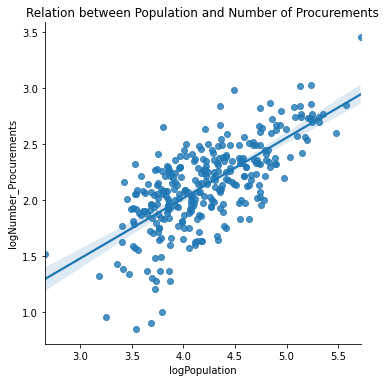

In [362]:
# 4.1
#i
plt.figure(figsize=(7,5))
sns.lmplot(data=data_pop, x='logPopulation', y='logNumber_Procurements')
plt.title('Relation between Population and Number of Procurements')
plt.show()

<Figure size 504x360 with 0 Axes>

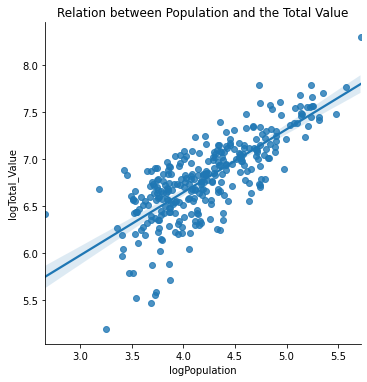

In [363]:
# 4.1
#ii
plt.figure(figsize=(7,5))
sns.lmplot(data=data_pop, x='logPopulation', y='logTotal_Value')
plt.title('Relation between Population and the Total Value')
plt.show()

5. Can you build a linear model using the library Statsmodel that regresses the Logarithms of the Total Value of issued procurements as a funcion of the population size? What coefficient did you find? <br>
**Tip:** You might to to look for some inspiration in the final part of Lab 7

In [364]:
import statsmodels.api as sm

In [365]:
data_pop['Intercept'] = 1
X = data_pop[['Intercept','logPopulation']]
y = data_pop['logTotal_Value']

model_OLS = sm.OLS(y, X).fit()

In [366]:
model_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         logTotal_Value   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     425.9
Date:                Thu, 28 Oct 2021   Prob (F-statistic):           6.78e-60
Time:                        21:47:17   Log-Likelihood:                -47.798
No. Observations:                 308   AIC:                             99.60
Df Residuals:                     306   BIC:                             107.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.9685      0.138     28.762      0.000       3.697       4.240
logPopulation     0.6703      0.032     20.637      0.000       0.606       0.734
==============================================================================
Omnibus:                       25.731   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.888
Skew:                          -0.646   Prob(JB):                     1.19e-07
Kurtosis:                       3.904   Cond. No.                         38.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b>R:</b> Population size has a coef ~ 0.7. This means that by each 1% increase in population size we expect the total value of the contracts will increase by 0.7 percentual points, ceteris paribus.

6. What if instead of the Total Value of issued procurments you had the Value per capita (per capita means per person in the local population)? How would that impact the results in points 6.4 and 6.5?<br>


In [367]:
data_pop['Total_Value_percapita'] = data_pop['Total_Value_Issued']/data_pop['Population']
data_pop['logTotal_Value_percapita'] = data_pop['Total_Value_percapita'].map(lambda x: np.log10(x+1))

In [368]:
data_pop.head(3)

,NIF,Municipality,Population,Number_Procurements_Issued,Total_Value_Issued,logTotal_Value,logNumber_Procurements,logPopulation,Intercept,Total_Value_percapita,logTotal_Value_percapita
0,500051054,Município de Almada,171481,725,2.793470e+07,7.446144,2.860937,5.234219,1,162.902592,2.214586
1,500051062,Município de Sintra,379860,710,5.900182e+07,7.770865,2.851870,5.579625,1,155.325168,2.194029
2,500051070,Município de Lisboa,520549,2861,2.001943e+08,8.301452,3.456670,5.716462,1,384.583089,2.586118


<Figure size 504x360 with 0 Axes>

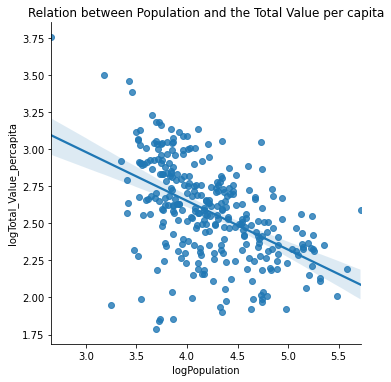

In [369]:
plt.figure(figsize=(7,5))
sns.lmplot(data=data_pop, x='logPopulation', y='logTotal_Value_percapita')
plt.title('Relation between Population and the Total Value per capita')
plt.show()

In [370]:
y2 = data_pop['logTotal_Value_percapita']

In [371]:
model_OLS2 = sm.OLS(y2, X).fit()

In [372]:
model_OLS2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     logTotal_Value_percapita   R-squared:                       0.252
Model:                                  OLS   Adj. R-squared:                  0.250
Method:                       Least Squares   F-statistic:                     103.3
Date:                      Thu, 28 Oct 2021   Prob (F-statistic):           4.26e-21
Time:                              21:47:38   Log-Likelihood:                -46.698
No. Observations:                       308   AIC:                             97.40
Df Residuals:                           306   BIC:                             104.9
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.9670      0.137     28.854      0.000       3.696       4.238
logPopulation    -0.3289      0.032    -10.163      0.000      -0.393      -0.265
==============================================================================
Omnibus:                       25.269   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.168
Skew:                          -0.639   Prob(JB):                     1.71e-07
Kurtosis:                       3.893   Cond. No.                         38.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b>R:</b> The direction of the relationship changed from positive to negative, ie. the increase in population size has a negative effect on contract value per capita. Now by each 1% increase in population size we expect total value per capita to deacrese by 0.33 percentual points, ceteris paribus. 

<b>[Step 7. | 2 point ]</b> Open Question. <br>
Given the dataset you have been exploring, and the analysis conducted over the municipalities procurement dataset with the population data. Can you think about a question that you consider interesting to explore? Does it require to obtain additional data from, for instance, pordata?

**On this final step you have full control. Be creative and show us your ability to raise a question, identify which data you require to explore it, and report the results. Be as objective and clear as possible with your answer.**

Use as many cells as necessary.

## End

Submit this notebook in Moodle along with a statement of authorship in a single .zip archive.